1.0 JUSTIFICATIVA DO PROJETO

Esta análise foi solicitada por um grande distribuidor de vinhos, localizado no estado do Rio de janeiro. Esta empresa solicitou uma analise minuciosa dos dados fisico-quimico de vinhos produzidos ao norte de portugal, tidos como uns dos melhores vinhos do mundo.

O Objetivo é importar vinhos nao somente de Portugual, mas tambem do Brasil que atendesse as proximidades das caracteristicas fisico-quimico dos vinhos analisados. 
A partir das analises de dados, referenciado pelos vinhos portugueses, cria se uma modelagem para o problema para que a empresa tomesse a decisão da compra dos vinhos por eles distribuidos

A primeira etapa foi entender o problema. Indentificamos que para este distribuidor não interessava vinhos com baixo valor agregado, o que esta diretamente ligado a Melhor Qualidade desta bebida.

A segunda etapa foi obter os dados para analise exploratoria e o Pré-Processamento. Atraves da Camara de Comercio de Vinhos do Norte de Portugal - CCVNP obtivemos o "Dataset" dos 1599 vinhos fabricados nesta região.

Identificvamos que as tarefas associadas a este datasets são: CLASSIFICAÇÃO E REGRESSÃO. O que nos leva a concluir que se trata de um APRENDIZADO SUPERVISIONADO

Junto ao engenheiro de alimentos e ao sommelierr do distribuidor, levantamos algumas premissas relacionadas a caracteristicas fisicas-quimicas que nos remetem a uma qualidade melhor de um vinho. Dentre as principais caracteristicas, declarada pelo especialista esta o pH do vinho, entretanto somente esta informação não nos remete a selecionar o de melhor qualidade, deverá ser analisado outras caracteristicas fundamentais para que a Ciências de Dados possa entregar uma modelagem mais assertiva 

________________________________________________________________________________

Etapa de Importação das Bibliotecas

In [1]:
# Importação do pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as ms # para tratamento de missings

# transformação Numerica
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# transformação categórica
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

Caminho de leitura do datasets

In [2]:
Qldvinhos= pd.read_csv(r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

Definição dos Atributos do datasets

In [3]:
labels_atributos = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', ]

Verificando que o Qldvinhos é um dataframe

In [4]:
type(Qldvinhos)

pandas.core.frame.DataFrame

Exibindo as cinco primeiras linhas do dataset

***Observa se nas duas primeiras linhas do atributo citric acidy ( Acido Citrico) estão zeradas.***

In [5]:
Qldvinhos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Exibindo as cinco ultimas linhas do dataset

In [6]:
Qldvinhos.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Exibindo o nome dos Atributos.

Os atributos são do tipo MULTIVARIADA e com seus valores em REAL

In [7]:
Qldvinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Definição dos Atributos do dataset**



*   **Fixed Acidity** = a acidez fixa refere-se, basicamente, aos ácidos que não são capazes de se volatilizar, provenientes da fermentação.

*   **Volatile Acidity** = acidez e aroma muito desagradável, provocado pela presença de teor elevado de ácido acético e de acetato de etila no vinho, compostos produzidos essencialmente por bactérias acéticas.

*   **Citric Acid** = O ácido cítrico está presente nas uvas em menor quantidade, sendo que nos vinhos apresenta pouca ou nenhuma presença. 

*  **Residual sugar **= o açúcar residual é proveniente da própria uva – pode ser frutose ou glicose – e resta ao final do processo de fermentação.Tendo seu valor ideal para vinhos tintos de 3 a 3,6

*   **chlorides** = Uma adição de sais no vinho. A sua principal função é de antioxidante, mas também possui funções de desinfetante porque é bactericida (em particular) e fungicida, melhorador de aroma e afinador de cor.

*   **Free Sulfur Dioxide** = Os sulfitos (SO2) são sais do ácido sulfuroso que são liberados quando o ácido se dissocia.

*   **total sulfur dioxide** = O dióxido de enxofre (SO2) é um composto muito importante utilizado na conservação de vinhos, devido às suas propriedades antioxidantes.

*  **density** =  Está relacionada principalmente ao seu teor alcoólico e de açúcares residuais.

*  **pH** = Teor de acidez do vinho, que varia entre o vinho branco e o vinho tinto.

*   **sulphates**= No vinho, o sulfito é utilizado como conservante, devido às suas propriedades antioxidantes e antibacterianas, evitando que os vinhos degradem de forma mais rápida.

*  **alcohol ** = É o resultado da fermentação dos açúcares da uva (glicose e frutose), que acontece graças a presença de leveduras no mosto. 

*   **quality** = As pontuações , onde varia de 0 a 10, onde 0 são vinhos de pessima qualidade e 10 de excelente qualidade









Dimensões do Dataset

O dataset possui 1599 linhas, 12 atributos e 4898 instâncias

In [20]:
Qldvinhos.shape

(1599, 12)

Exibindo a quantidade de linhas do dataset

In [9]:
Qldvinhos.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

Sumário Estatistico

In [8]:
Qldvinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Analisando o Sum'srio estatistico, observamos que as variáveis  ***'chlorides' e 'density'*** apresentam >>>>> desvio padrão (std). Eliminaremos estas variáves da analise de dados, pois praticamente não há variação de valores em ambas colunas



In [10]:
Qldvinhos.drop(columns=['chlorides' ,'density'])

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,32.0,44.0,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,39.0,51.0,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,29.0,40.0,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,32.0,44.0,3.57,0.71,10.2,5


Ordenando o dataframe por uma coluna, da maior para a menor qualidade

In [11]:
Qldvinhos.sort_values(by='quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


In [12]:
# Selecionando uma coluna especifica

Qldvinhos['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Tabela com os vinhos de melhores Qualidade. 

In [ ]:
Qldvinhos[Qldvinhos['quality'] >= 6]

In [ ]:
# Boxplot da Qualidade do vinho
sns.boxplot(x= Qldvinhos['quality']);

In [ ]:
plt.hist(Qldvinhos['quality'], bins=8, edgecolor='black', color= 'blue')

In [ ]:
# Boxplot da Acidez Fixa
sns.boxplot(x= Qldvinhos['fixed acidity']);

In [ ]:
plt.hist(Qldvinhos['fixed acidity'], bins=1599, edgecolor='black', color= 'blue')

In [ ]:
# Boxplot da Acidez Volátil
sns.boxplot(x= Qldvinhos['volatile acidity']);

In [ ]:
# Boxplot da Acidez Citríco
sns.boxplot(x= Qldvinhos['citric acid']);

In [ ]:
# Boxplot da Açucar Residual
sns.boxplot(x= Qldvinhos['residual sugar']);

In [ ]:
# Boxplot Cloreto
sns.boxplot(x= Qldvinhos['chlorides']);

In [ ]:
# Boxplot Dioxido de Enxofre Livre
sns.boxplot(x= Qldvinhos['free sulfur dioxide']);

In [ ]:
# Boxplot Dioxido de Enxofre Total
sns.boxplot(x= Qldvinhos['total sulfur dioxide']);

In [ ]:
# Boxplot Densidade
sns.boxplot(x= Qldvinhos['density']);

In [ ]:
# Boxplot pH
sns.boxplot(x= Qldvinhos['pH']);

In [ ]:
# Boxplot Sulfato
sns.boxplot(x= Qldvinhos['sulphates']);

In [ ]:
# Boxplot Alcool
sns.boxplot(x= Qldvinhos['alcohol']);

In [ ]:
sns.pairplot(Qldvinhos);

In [ ]:
sns.pairplot(Qldvinhos, hue = "quality")

ETAPA DE PRÉ-PROCESSAMENTO

Carregando o Dataset ORIGINAL

In [14]:
# Informa a URL de importação do dataset
url = (r'https://raw.githubusercontent.com/salimNabbout/Qualidade_Vinhos_Norte_Portugal/main/content/winequality-red.csv')

# Lê o arquivo 
dataset = pd.read_csv(url, delimiter=',')

# Exibindo as primeiras linhas
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tratamento de MISSING

Verificando os Valores faltantes no Datasets


In [15]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Salvando um novo arquivo, chamado de Dataset em substituição ao original "Qldvinhos" para executar o tratamento de MISSING

<Axes: >

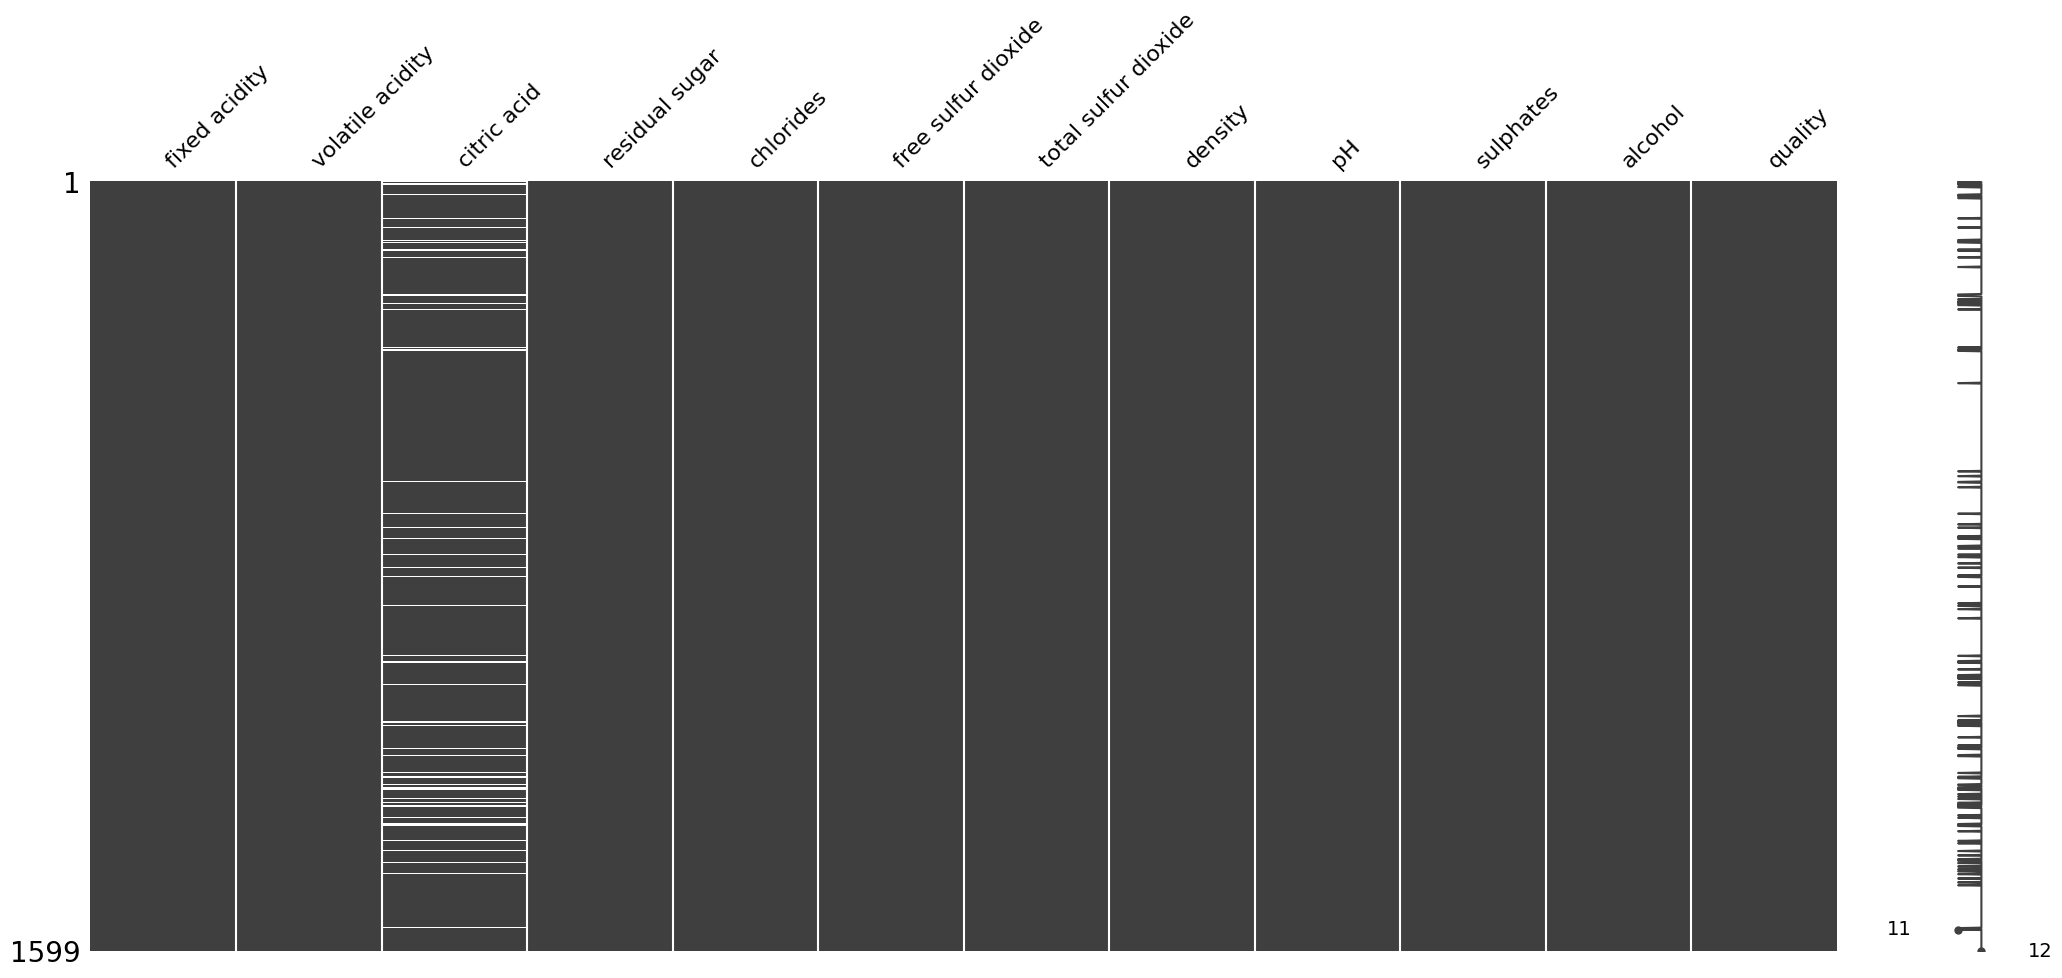

In [16]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Reverificando o dataset, apos as substituições dos zeros por NaN.

In [17]:
datasetSemMissings.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

TRATANDO O DATASETS

Existem 132 valores zerados na coluna do "citric acis", como este valor representa 8,2% do total dos valores desta coluna, iremos substituir esses valores faltantes pela mediana da coluna.

Substituindo os NaN de "citric acid" pela mediana da coluna

Exibindo a Matriz de nulidade do dataset

<Axes: >

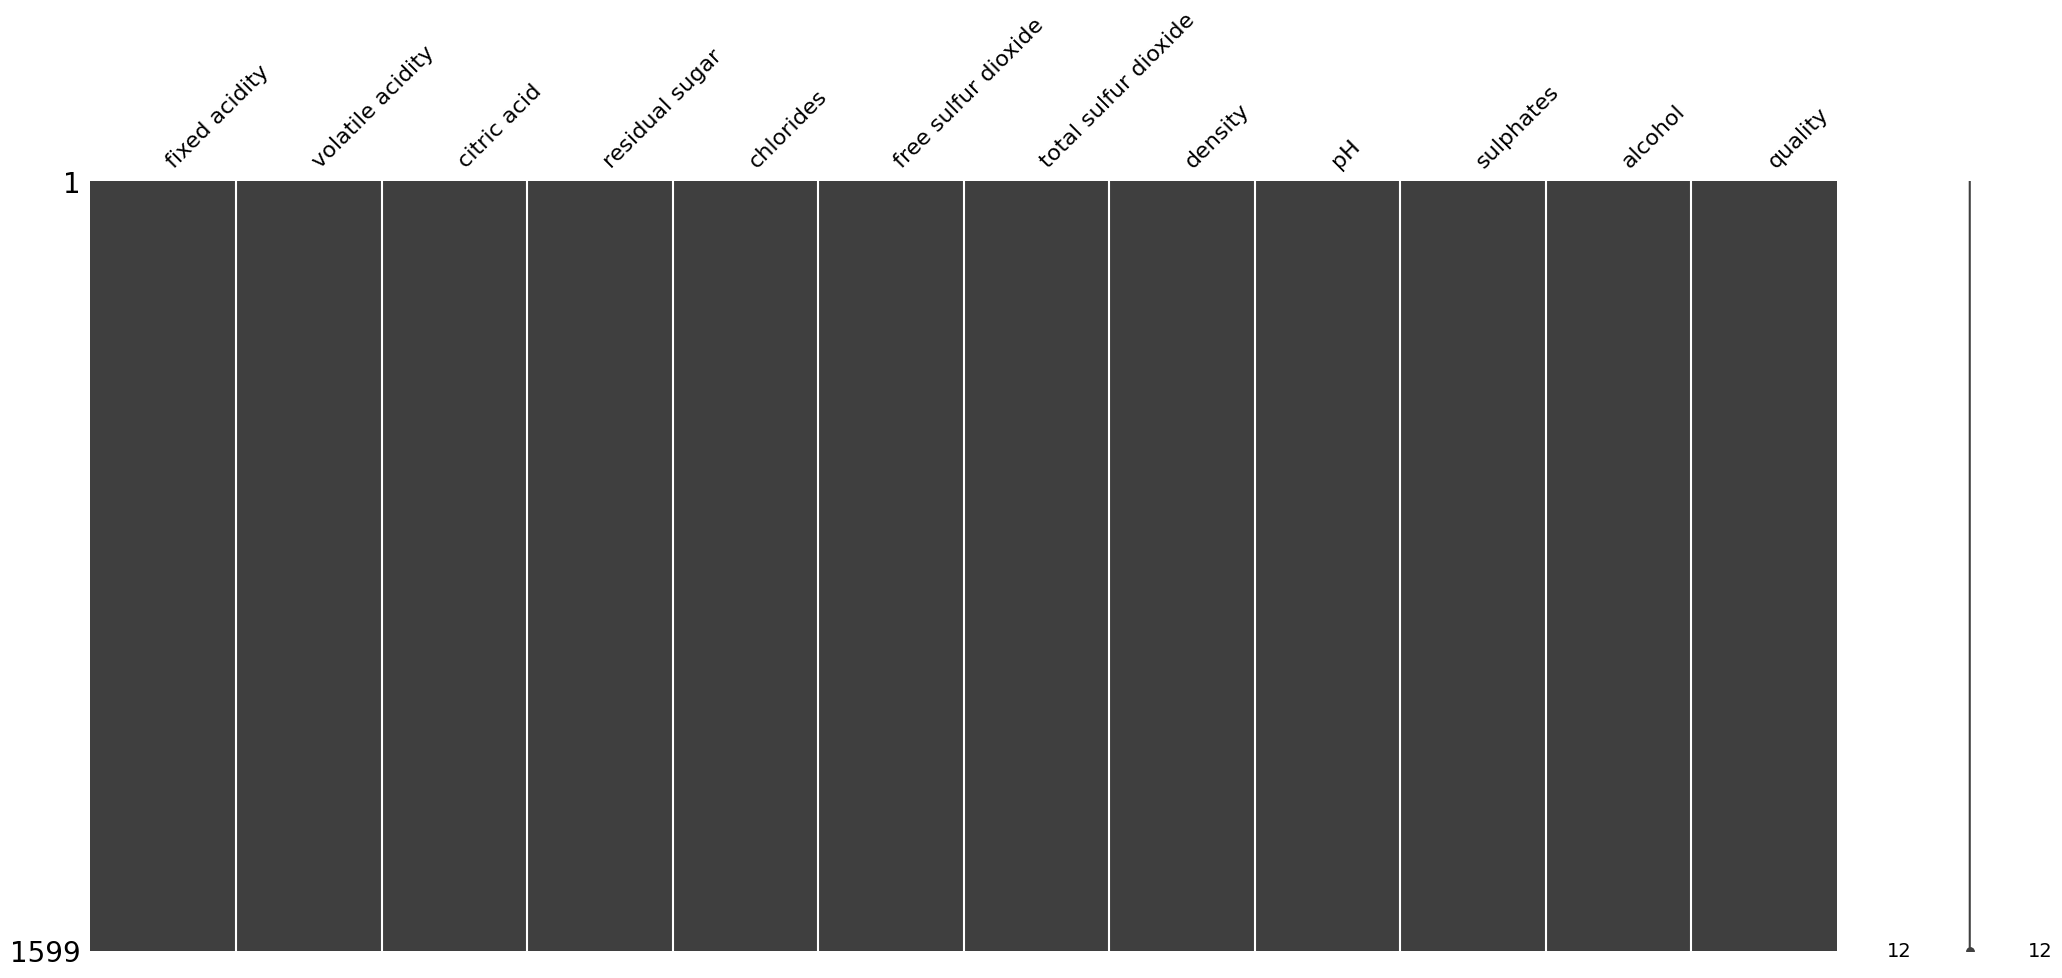

In [18]:
datasetSemMissings['citric acid'].fillna(datasetSemMissings['citric acid'].median(), inplace=True)

ms.matrix(datasetSemMissings)

Dataset tratado preservando as caracteristicas de linhas e colunas do dataset original. Entretantos os zeros na coluna do atributo "citric acid" foram substituidos pela mediana desta coluna (0,28), que se observava nas linhas 0 e 1 do dataset origienal em comparação ao dataset antes do tratamento



In [19]:
datasetSemMissings.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.28,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.28,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.28,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.28,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Confirmando as boas praticas do tratamento do dataset, onde se constata que nenhuma linha desceu por NÃO apresentar MISSING em TODAS linhas ou colunas.

In [20]:
dataset=dataset.dropna(how='all')
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Confirmando as boas praticas do tratamento do dataset, onde se constata que nenhuma linha desceu por NÃO apresentar MISSING em ALGUMAS linhas ou colunas.

In [34]:
dataset=dataset.dropna(how='any')
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Vereificando os NULLS do dataset Tratado

In [35]:
datasetSemMissings.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

TRANSFORMAÇÃO NUMERICA

Etapa de Normalização dos dados

In [36]:
scaler= MinMaxScaler()
scaled= scaler.fit_transform(dataset)
print(scaled)

[[0.24778761 0.39726027 0.         ... 0.13772455 0.15384615 0.4       ]
 [0.28318584 0.52054795 0.         ... 0.20958084 0.21538462 0.4       ]
 [0.28318584 0.43835616 0.04       ... 0.19161677 0.21538462 0.4       ]
 ...
 [0.15044248 0.26712329 0.13       ... 0.25149701 0.4        0.6       ]
 [0.11504425 0.35958904 0.12       ... 0.22754491 0.27692308 0.4       ]
 [0.12389381 0.13013699 0.47       ... 0.19760479 0.4        0.6       ]]


ETapa de Padronização dos dados

In [37]:
scaler= StandardScaler()
scaled= scaler.fit_transform(dataset)
print(scaled)

[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
  -0.78782264]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
  -0.78782264]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   0.45084835]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
  -0.78782264]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   0.45084835]]


TRANSFORMAÇÃO CATEGÓRICA

One-Hot Encoding

In [38]:
encoder=OneHotEncoder(sparse_output= False)
onehot=encoder.fit_transform(dataset)
print(onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


Dummy Encoding

In [39]:
encoder=OneHotEncoder(drop= 'first', sparse_output= False)
dummy= encoder.fit_transform(dataset)
print(dummy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


ANALISE ESTATISTICA 

SUMÁRIO ESTATISTICO DO DATASET TRATADO

Observamos no Sumário Estatistico que os atributos: 	**volatile acidity,**	***citric acid,***		***chlorides***,		***density,***	*pH,*	***sulphates, ***, tem seus Desvios Padrão baixos. Levando em consideração esta observação, eliminaremos estas colunas para efeito de analise quantitativa destes elementos, na etapa de analise individual dos atributos. 	

In [40]:
datasetSemMissings.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.294090,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.177071,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.280000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


CALCULO ESTATISTICO POR ATRIBUTO



Verificando ausencia de valores no dataset por atributo

Observamos que NÃO existem valores não nulos 

In [174]:
datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Analise Estatistica do atributo Qualidade**


In [42]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'quality'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'quality'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'quality']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'quality']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'quality']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'quality']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'quality']. min()

print("variancia quality = " + str(variancia))
print("desviopd quality = " + str(desviopd))
print("media quality = " + str(media))
print("median quality = " + str(median))
print("mode quality = " + str(mode))
print("max quality = " + str(max))
print("min quality = " + str(min))

variancia quality = 0.6517605398308277
desviopd quality = 0.8073168769639513
media quality = 5.6360225140712945
median quality = 6.0
mode quality = 0    5
Name: quality, dtype: int64
max quality = 8
min quality = 3


<Axes: xlabel='quality'>

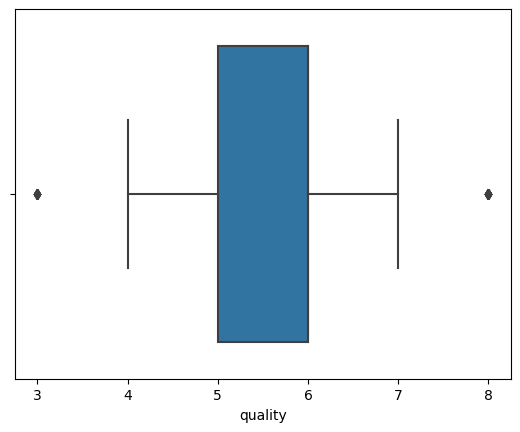

In [43]:
sns.boxplot(x=datasetSemMissings['quality'])

Observando o grafico acima, obseramos que os valores considerado limites estão representado como outliers, no que se refere a pontuação da qualidade do vinho. 
Adotamos como qualidade satisfatoria para indicar ao cliente, os vinhos pontuados por 6 e 7. Desta forma aplicamos os primeiros filtros para determinação dos novos fornecedores para o cliente.

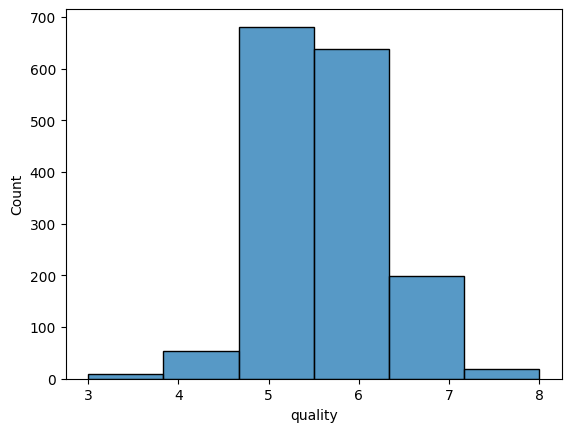

In [44]:
sns.histplot(datasetSemMissings['quality'], bins=6);

Os vinhos com pontuação 5 aparecem em maior frequencia em nosso histograma, o que quantitativamente ja seria uma gama sufuiciente de fornecedores a serem avaliados para o cliente, dentro de um padrão de mesma qualidade. Entretanto optamos por indicar os vinhos pontuados por 6 e 7 , que juntos somados proporcionam uma maior opção de possiveis fornecedores com um padão melhor de qualidade.

In [177]:
dfqualidade=datasetSemMissings[(datasetSemMissings['quality']>=6) & (datasetSemMissings['quality']<=7)] 
print(dfqualidade)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3              11.2              0.28         0.56             1.9      0.075   
7               7.3              0.65         0.28             1.2      0.065   
8               7.8              0.58         0.02             2.0      0.073   
16              8.5              0.28         0.56             1.8      0.092   
19              7.9              0.32         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1592            6.3              0.51         0.13             2.3      0.076   
1593            6.8              0.62         0.08             1.9      0.068   
1595            5.9              0.55         0.10             2.2      0.062   
1596            6.3              0.51         0.13             2.3      0.076   
1598            6.0              0.31         0.47             3.6      0.067   

      free sulfur dioxide  

A tabela acima, nos permitem observar que possiveis 837 vinhos deverão  ser avaliados pelas suas caracteristicas quimicas-fisicas de cada atributo do dataframe gerado para a primeira filtragem, a qualidade.

Nesta etapa filtramos a coluna da qualidade com os vinhos classificados pelo peso de sua qualidade , na faixa de 6 e 7. 

**Analise estatistica do atributo - fixed acidity**


No vinho, a acidez fixa refere-se, basicamente, aos ácidos que não são capazes de se volatilizar (ácidos fixos). 
A unidade de medida desta variável é grama/litro (g/l). 

Segundo o especialista do cliente, valores entre 5.8 g/l e 7.9 g/l são caracteristicas aceitaveis como  vinhos de boa qualidade


In [45]:
# Calculo da Variancia
variancia = datasetSemMissings.loc[:,'fixed acidity'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'fixed acidity'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'fixed acidity']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'fixed acidity']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'fixed acidity']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'fixed acidity']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'fixed acidity']. min()

print("variancia fixed acidity = " + str(variancia))
print("desviopd fixed acidity = " + str(desviopd))
print("media fixed acidity = " + str(media))
print("median fixed acidity = " + str(median))
print("mode fixed acidity = " + str(mode))
print("max fixed acidity = " + str(max))
print("min fixed acidity = " + str(min))

variancia fixed acidity = 3.0295205688671114
desviopd fixed acidity = 1.7405518001102729
media fixed acidity = 8.31963727329581
median fixed acidity = 7.9
mode fixed acidity = 0    7.2
Name: fixed acidity, dtype: float64
max fixed acidity = 15.9
min fixed acidity = 4.6


<Axes: xlabel='fixed acidity'>

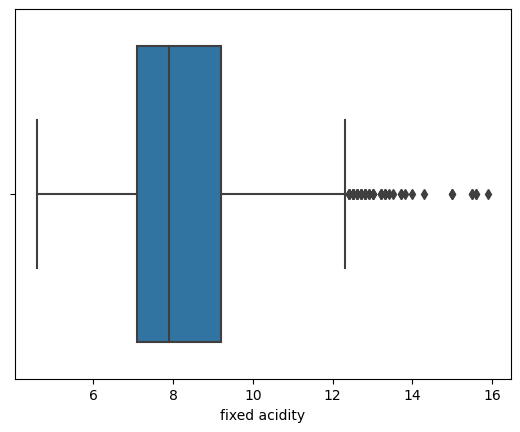

In [46]:
sns.boxplot(x=datasetSemMissings['fixed acidity'])

No grafico acima percebemos a dispersão dos dados com sua simetria a direita. Os dados demosntrados no grafico vem de encontro com os valores fornecidos pelo especialista, onde a Acidez Fixa esta dentro da faixa de 5,8 mg/l a 8,9 mg/l

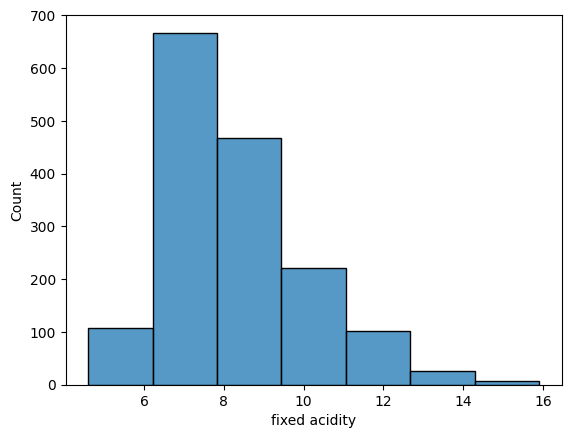

In [47]:
sns.histplot(datasetSemMissings['fixed acidity'], bins=7);

No grafico acima observamos que os valores de acidez fixa desejado pelo cliente estão presente em 1087 diferentes fabricantes desta bebida.

Confirmado pela tabela abaixo os fabricantes que atendem a este atributo

In [21]:
dfacidezfixa= datasetSemMissings[(datasetSemMissings['fixed acidity']>=5.8) & (datasetSemMissings['fixed acidity']<=8.9)]
print(dfacidezfixa)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.28             1.9      0.076   
1               7.8             0.880         0.28             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
4               7.4             0.700         0.28             1.9      0.076   
5               7.4             0.660         0.28             1.8      0.075   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**Analise estatistica do atributo - Residual Sugar**

O açúcar é o alimento das leveduras que o transformam em álcool durante o processo de fermentação. E o que sobra no vinho chamamos de residual.

O valor do açucar residual, depende da legislação de cada pais.

o valor fornecido pelo especialista foi de 2 gr/litro a 4.2 gr/litro



In [48]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'residual sugar'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'residual sugar'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'residual sugar']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'residual sugar']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'residual sugar']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'residual sugar']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'residual sugar']. min()

print("variancia residual sugar = " + str(variancia))
print("desviopd residual sugar = " + str(desviopd))
print("media residual sugar = " + str(media))
print("median residual sugar = " + str(median))
print("mode residual sugar = " + str(mode))
print("max residual sugar = " + str(max))
print("min residual sugar = " + str(min))

variancia residual sugar = 1.9866539202698996
desviopd residual sugar = 1.4094871124880495
media residual sugar = 2.53880550343965
median residual sugar = 2.2
mode residual sugar = 0    2.0
Name: residual sugar, dtype: float64
max residual sugar = 15.5
min residual sugar = 0.9


<Axes: xlabel='residual sugar'>

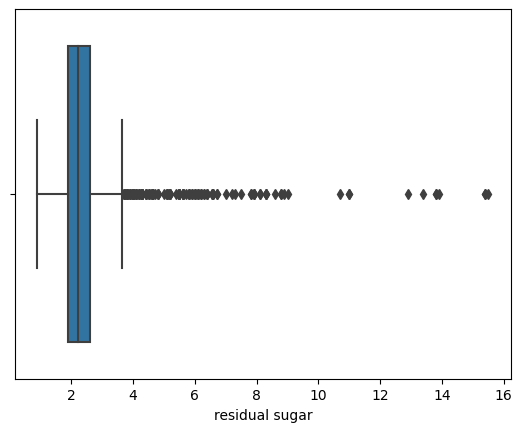

In [49]:
sns.boxplot(x=datasetSemMissings['residual sugar'])

O grafico de caixa mostra a grande quantidade de outliers referente ao açucar residual. Entretanto os valores fornecidos pelo especialista estão presentes dentro dos limites fornecidos pelos dataframe acima.

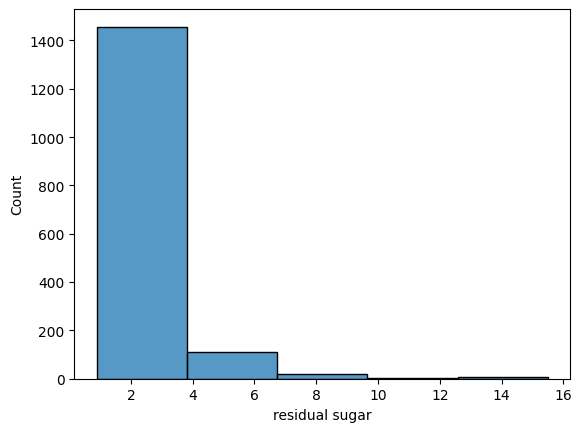

In [50]:
sns.histplot(datasetSemMissings['residual sugar'], bins=5);

Confirmando a veracidade do grafico de caixa. O histograma aponta para a frequencia dos valores lidos no dataset. Observamos a grande frequencia, nesta variável, dentro dos limites aceitaveis.

In [193]:
dfacucarresidual= datasetSemMissings[(datasetSemMissings['residual sugar']>=2) & (datasetSemMissings['residual sugar']<=4.2)]
print(dfacucarresidual)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1               7.8             0.880         0.28             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
8               7.8             0.580         0.02             2.0      0.073   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Analise estatistica do atibuto - free sulfur dioxide

In [51]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'free sulfur dioxide'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'free sulfur dioxide'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'free sulfur dioxide']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'free sulfur dioxide']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'free sulfur dioxide']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'free sulfur dioxide']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'free sulfur dioxide']. min()

print("variancia free sulfur dioxide = " + str(variancia))
print("desviopd free sulfur dioxide = " + str(desviopd))
print("media free sulfur dioxide = " + str(media))
print("median free sulfur dioxide = " + str(median))
print("mode free sulfur dioxide = " + str(mode))
print("max free sulfur dioxide = " + str(max))
print("min free sulfur dioxide = " + str(min))

variancia free sulfur dioxide = 109.34645676374501
desviopd free sulfur dioxide = 10.45688561493072
media free sulfur dioxide = 15.874921826141339
median free sulfur dioxide = 14.0
mode free sulfur dioxide = 0    6.0
Name: free sulfur dioxide, dtype: float64
max free sulfur dioxide = 72.0
min free sulfur dioxide = 1.0


<Axes: xlabel='free sulfur dioxide'>

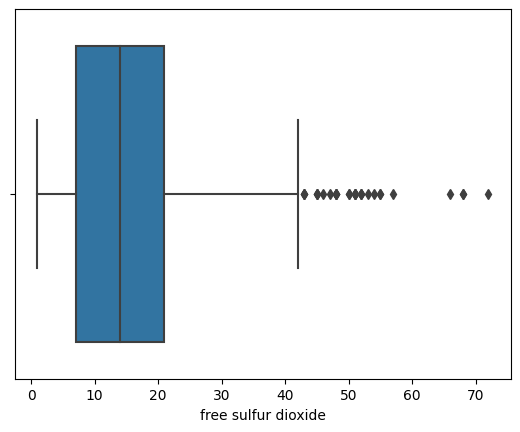

In [52]:
sns.boxplot(x=datasetSemMissings['free sulfur dioxide'])

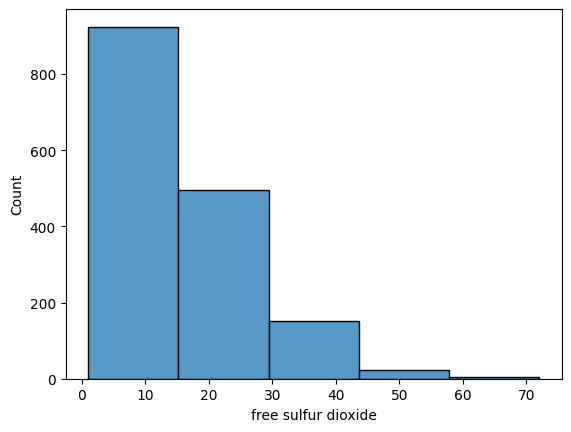

In [53]:
sns.histplot(datasetSemMissings['free sulfur dioxide'], bins=5);

Analise estatistica do atibuto - total sulfur dioxide

In [ ]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'total sulfur dioxide'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'total sulfur dioxide'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'total sulfur dioxide']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'total sulfur dioxide']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'total sulfur dioxide']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'total sulfur dioxide']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'total sulfur dioxide']. min()

print("variancia total sulfur dioxide = " + str(variancia))
print("desviopd total sulfur dioxide = " + str(desviopd))
print("media total sulfur dioxide = " + str(media))
print("median total sulfur dioxide = " + str(median))
print("mode total sulfur dioxide = " + str(mode))
print("max total sulfur dioxide = " + str(max))
print("min total sulfur dioxide = " + str(min))

<Axes: xlabel='total sulfur dioxide'>

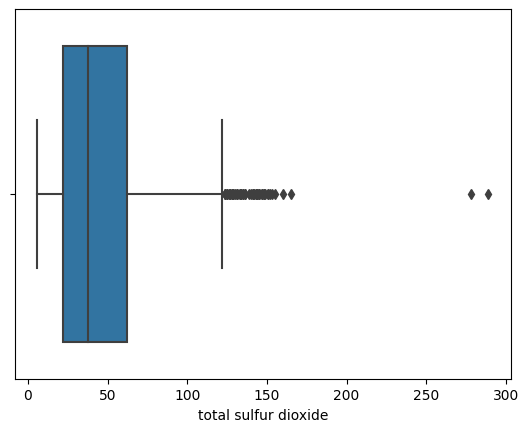

In [55]:
sns.boxplot(x=datasetSemMissings['total sulfur dioxide'])

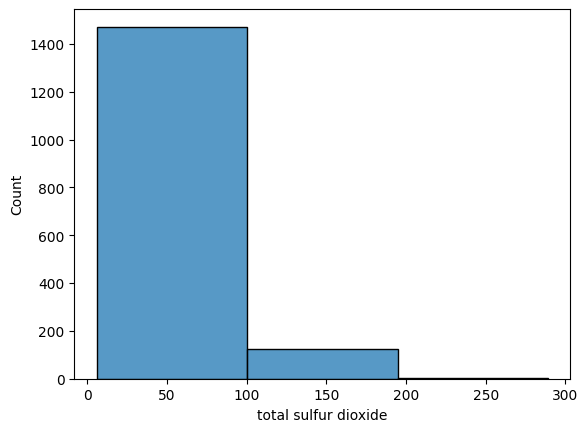

In [56]:
sns.histplot(datasetSemMissings['total sulfur dioxide'], bins=3);

Analise estatistica do atibuto - alcohol

In [57]:
#Calculo da Variancia
variancia = datasetSemMissings.loc[:,'alcohol'].var(ddof=0)
# Calculo do desvio padrão
desviopd= datasetSemMissings.loc[:,'alcohol'].std(ddof=0)
# Calculo da media
media= datasetSemMissings.loc[:,'alcohol']. mean()
# calculo da Mediana
median= datasetSemMissings.loc[:,'alcohol']. median()
# Calculo da Moda
mode= datasetSemMissings.loc[:,'alcohol']. mode()
# calculo da Maxima
max= datasetSemMissings.loc[:,'alcohol']. max()
# calculo do Minimo
min= datasetSemMissings.loc[:,'alcohol']. min()

print("variancia alcohol = " + str(variancia))
print("desviopd alcohol = " + str(desviopd))
print("media alcohol = " + str(media))
print("median alcohol = " + str(median))
print("mode alcohol = " + str(mode))
print("max alcohol = " + str(max))
print("min alcohol = " + str(min))

variancia alcohol = 1.1349371714889036
desviopd alcohol = 1.0653343003437483
media alcohol = 10.422983114446529
median alcohol = 10.2
mode alcohol = 0    9.5
Name: alcohol, dtype: float64
max alcohol = 14.9
min alcohol = 8.4


<Axes: xlabel='alcohol'>

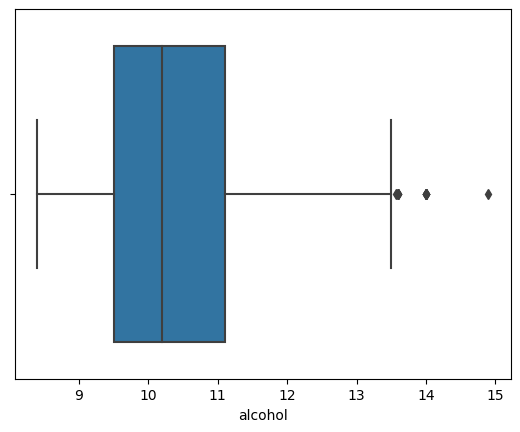

In [58]:
sns.boxplot(x=datasetSemMissings['alcohol'])

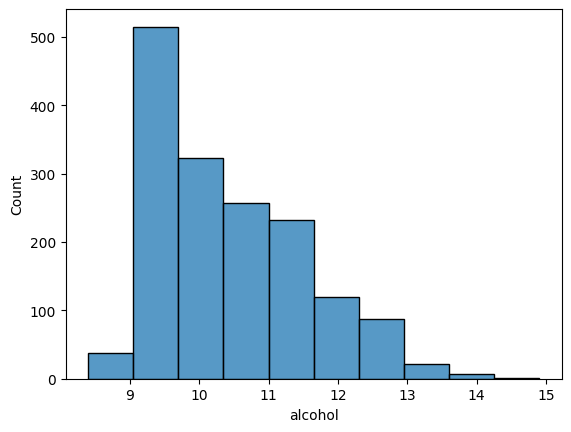

In [59]:
sns.histplot(datasetSemMissings['alcohol'], bins=10);